In [3]:
%reset -f
%matplotlib inline
import matplotlib as mpl
import numpy as np
from numpy import array as a
import matplotlib.pyplot as plt
import numpy.random as rng
import itertools as it
from scipy.special import expit as sigmoid
np.set_printoptions(precision = 2, suppress = True)
import time
rng.seed(int(time.time())) # seed the random number generator

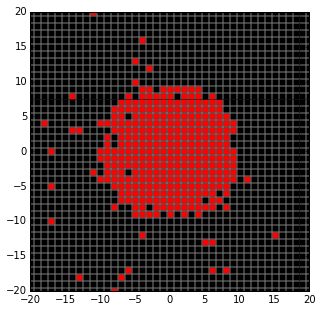

In [50]:
in_circle = lambda x, y: 1 if x**2 + y**2 <= 100 else -1

def do_plot(dataset, phi):
    plt.figure(figsize=(5,5))
    for i, x in enumerate(dataset):
        plt.plot(x[0], x[1], marker='s', c=((np.sign(phi[i])+1)/2, 0, 0))

dataset = a([ a([x,y,1]) for x, y in it.product(range(-20, 21), range(-20, 21)) ])
ts = a( [in_circle(x, y) for x, y, _ in dataset] )

αs = np.ones(dataset.shape[0])
phi = np.zeros(dataset.shape[0])

ITERATIONS = 100000
for _ in range(ITERATIONS):
    y = np.sign(dataset.dot(rng.normal(size=3)))
    W = np.log( np.sum(αs[y == ts]) / np.sum(αs[y != ts]) )
    αs = αs * np.exp(-W * ts * y)
    phi += W * y
    
do_plot(dataset, phi)